**Goal**: Inspect the waring messages and errors of the QChecker tool run on the LintQ dataset.

In [10]:
import project_path
from rdlib import *  # this imports the base libraries

In [11]:
CONFIG_FILE = '../config/competitors/qchecker_v08.yaml'
with open(CONFIG_FILE) as f:
    config = yaml.safe_load(f)

DIR_OUTPUT = os.path.join("..", config['output_folder'])

In [12]:
DIR_OUTPUT

'../data/datasets/exp_v08/qchecker'

In [16]:
import glob
all_csv_files = glob.glob(os.path.join(DIR_OUTPUT, '*.csv'))
print(all_csv_files)
# read all in the same pandas dataframe
df = pd.concat([pd.read_csv(f) for f in all_csv_files])
df.head()

['../data/datasets/exp_v08/qchecker/IIS.csv', '../data/datasets/exp_v08/qchecker/IG.csv', '../data/datasets/exp_v08/qchecker/CE.csv', '../data/datasets/exp_v08/qchecker/IM.csv', '../data/datasets/exp_v08/qchecker/PE.csv', '../data/datasets/exp_v08/qchecker/CM.csv', '../data/datasets/exp_v08/qchecker/MI.csv', '../data/datasets/exp_v08/qchecker/QE.csv', '../data/datasets/exp_v08/qchecker/DO.csv']


,filename,checker,description,line,message,error,error_type
0,qiskit_runner_a05ff0.py,IIS,Incorrect initial state,NaN,Error analyzing file: local variable 'value' r...,True,analysis_error
1,01_operator_flow_87f6ae.py,IIS,Incorrect initial state,NaN,Error analyzing file: local variable 'value' r...,True,analysis_error
2,graders_f3ed23.py,IIS,Incorrect initial state,NaN,No warnings to report.,False,NaN
3,challenge4_circuitdecomposition_6c33bd.py,IIS,Incorrect initial state,NaN,No warnings to report.,False,NaN
4,run_circuit_3a72ed.py,IIS,Incorrect initial state,NaN,No warnings to report.,False,NaN


In [17]:
# fill nan with empty string
# df = df.fillna('')

<AxesSubplot: xlabel='count', ylabel='checker'>

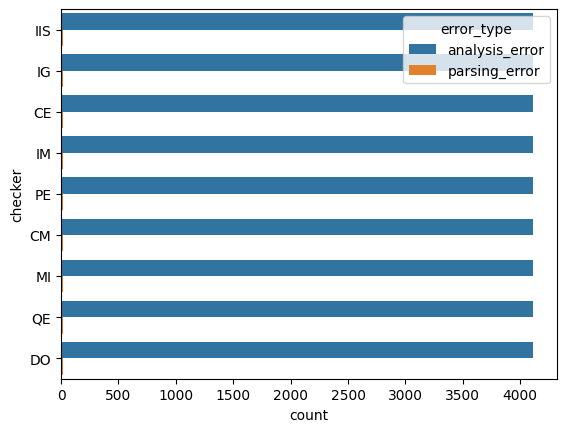

In [18]:
sns.countplot(
    data=df,
    y='checker',
    hue='error_type',
)


In [27]:
# count the unique files for which we have an analysis over the total number of files
n_all_files = len(df['filename'].unique())
print(f'Number of files analyzed: {n_all_files}')

n_files_leading_to_analysis_error = len(df[
    df['error_type'] == 'analysis_error']['filename'].unique())
print(f'Number of files leading to analysis error: {n_files_leading_to_analysis_error}')

perc_analysis_error = n_files_leading_to_analysis_error / n_all_files * 100
print(f'Percentage of files leading to analysis error: {perc_analysis_error:.2f}%')


Number of files analyzed: 7568
Number of files leading to analysis error: 4115
Percentage of files leading to analysis error: 54.37%


In [21]:
df_warnings = df[
    (df['error'] == False) & 
    (df['message'] != 'No warnings to report.')  
]
df_warnings.head()

,filename,checker,description,line,message,error,error_type
8,circuit_basics_49646b.py,IIS,Incorrect initial state,50.0,"meas.measure(range(3), range(3))",False,NaN
9,final5_oracle_test_mymap_61e2ed.py,IIS,Incorrect initial state,106.0,"circ.measure(oracle_q, oracle_c)",False,NaN
15,bb84_8e22cc.py,IIS,Incorrect initial state,82.0,"bob_results = measure_message(message, bob...",False,NaN
26,two_register_8d4cad.py,IIS,Incorrect initial state,27.0,"meas.measure(qreg0, creg0)",False,NaN
29,e91_20_20demo_390e5b.py,IIS,Incorrect initial state,112.0,"circuit.measure(q, b)",False,NaN


Text(0.5, 0, 'Number of warnings')

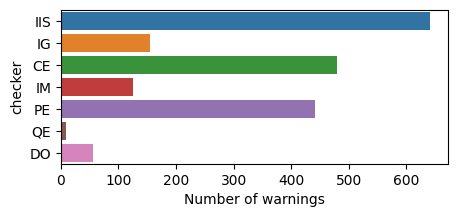

In [25]:
fig, ax = plt.subplots(figsize=(5, 2))
sns.countplot(
    data=df_warnings,
    y='checker',
)
ax.set_xlabel('Number of warnings')
